<a href="https://colab.research.google.com/github/slothnojutsu/tripletreat/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

#df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
#df.head()

#df = pd.read_csv('/content/drive/MyDrive/imdb_top_1000.csv')
#df.head()
print(df.columns)
print(df.dtypes)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross',
       'Rating_High'],
      dtype='object')
Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
Rating_High        int64
dtype: object


## (1) Identify two attributes in the consumable usage dataset and develop a linear regression model using the identified attributes and sklearn.linear_model.LinearRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using matplotlib to show the observed and the predicted values.

Mean Squared Error: 0.07133890938926876
R² Score: 0.0590956155049176


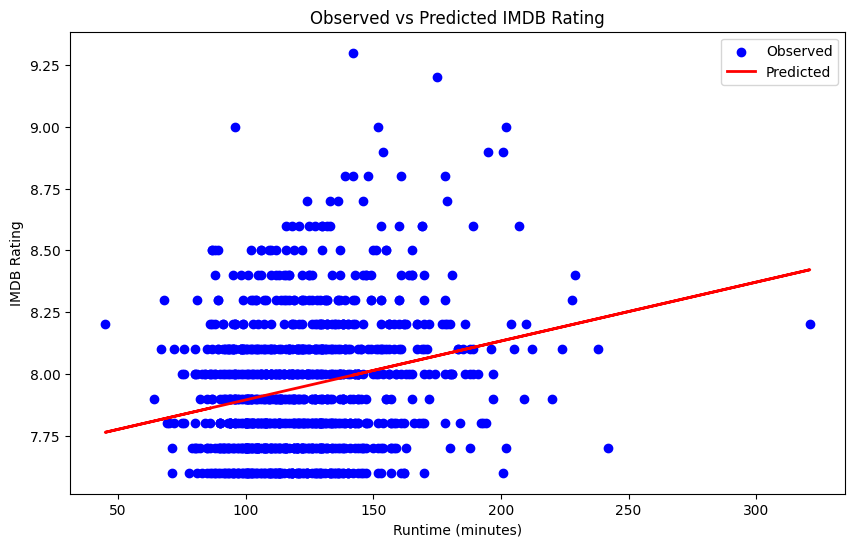

In [45]:
# Load IMDb dataset
df = pd.read_csv('/content/drive/MyDrive/imdb_top_1000.csv')

# Convert Runtime to numeric by extracting only the numeric part
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)

# Drop rows with NaN values in the selected columns
df = df.dropna(subset=['Runtime', 'IMDB_Rating'])

# Define independent and dependent variables
X = df[['Runtime']]  # Runtime as independent variable
y = df['IMDB_Rating']  # IMDB Rating as dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate Mean Squared Error (MSE) and R² score
mse = np.mean((y - y_pred) ** 2)
r2 = model.score(X, y)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Observed')
plt.plot(X, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDB Rating')
plt.title('Observed vs Predicted IMDB Rating')
plt.legend()
plt.show()


## (2) Identify more than two attributes in the consumable usage dataset and develop a multiple linear regression model using the identified attributes and sklearn.linear_model.LinearRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using mplot3d to show the observed and the predicted values.

Mean Squared Error: 0.04507595421437879
R² Score: 0.4394128719843817


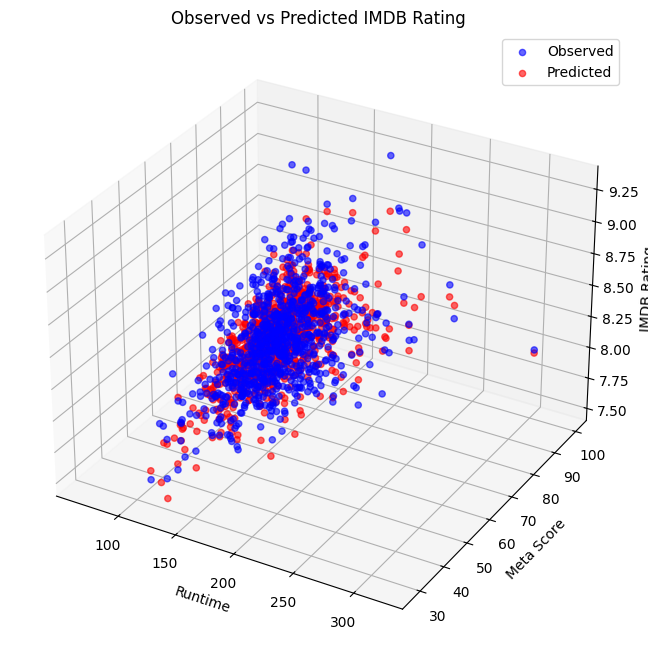

In [46]:


# Convert relevant columns to numeric types
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')

# Drop rows with NaN values in the selected columns
df = df.dropna(subset=['Runtime', 'Meta_score', 'No_of_Votes', 'IMDB_Rating'])

# Define independent and dependent variables
X = df[['Runtime', 'Meta_score', 'No_of_Votes']]  # Independent variables
y = df['IMDB_Rating']  # Dependent variable

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate Mean Squared Error (MSE) and R² score
mse = np.mean((y - y_pred) ** 2)
r2 = model.score(X, y)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plot observed vs predicted values in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for observed values
ax.scatter(df['Runtime'], df['Meta_score'], df['IMDB_Rating'], color='blue', label='Observed', alpha=0.6)

# Scatter plot for predicted values
ax.scatter(df['Runtime'], df['Meta_score'], y_pred, color='red', label='Predicted', alpha=0.6)

ax.set_xlabel('Runtime')
ax.set_ylabel('Meta Score')
ax.set_zlabel('IMDB Rating')
ax.set_title('Observed vs Predicted IMDB Rating')

# Show the legend
ax.legend()

# Show the plot
plt.show()

## (3) Develop a logistic regression model among some identified attributes in the consumable usage dataset and sklearn.linear_model.LogisticRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using matplotlib to show the observed and the predicted values.

count    843.000000
mean       7.931673
std        0.283732
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.300000
Name: IMDB_Rating, dtype: float64
Rating_High
1    579
0    264
Name: count, dtype: int64
Accuracy: 0.6832740213523132


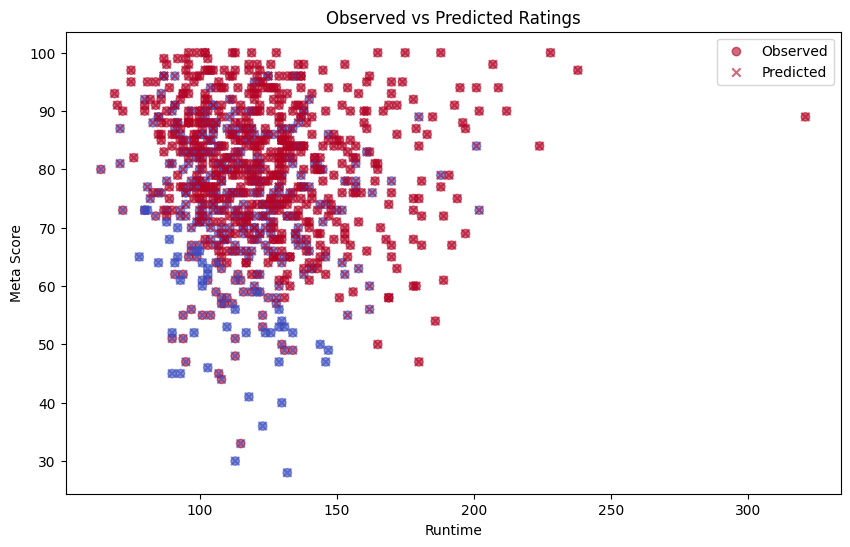

In [47]:
# Convert relevant columns to numeric types
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')

# Drop rows with NaN values in the selected columns
df = df.dropna(subset=['Runtime', 'Meta_score', 'IMDB_Rating'])

# Check the distribution of IMDB_Rating
print(df['IMDB_Rating'].describe())

# Adjust the threshold:
# Set a threshold for high ratings,
threshold = 7.7  # Lowered the threshold
df['Rating_High'] = np.where(df['IMDB_Rating'] > threshold, 1, 0)

# Check if we now have both classes (0 and 1)
print(df['Rating_High'].value_counts())

# Define independent variables (Runtime and Meta_score) and target variable (Rating_High)
X = df[['Runtime', 'Meta_score']]  # Independent variables
y = df['Rating_High']  # Binary target variable (whether IMDB_Rating > 6)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f'Accuracy: {accuracy}')

# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df['Runtime'], df['Meta_score'], c=y, cmap='coolwarm', label='Observed', alpha=0.6)
plt.scatter(df['Runtime'], df['Meta_score'], c=y_pred, cmap='coolwarm', marker='x', label='Predicted', alpha=0.6)
plt.xlabel('Runtime')
plt.ylabel('Meta Score')
plt.title('Observed vs Predicted Ratings')
plt.legend()
plt.show()

## Conclusion :
Data preprocessing and feature engineering are very important for successful model development. Handling missing data, ensuring that the data types are appropriate for  the analysis, and adjusting thresholds or variables are all crucial steps in building a good model
Both linear and logistic regression models require careful attention to data distribution, feature selection, and evaluation criteria. Also the choice of threshold in classification tasks can have a significant impact on the model’s ability to learn and predict accurately.